### <span style='color:plum'> Autores: David López y Jimena de Prado </span>

# <span style='color:mediumpurple'> SEMANA 1 </span>

- Importamos las librerías necesarias y leeemos los datos


In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
y=data['Churn Status']


#### <span style='color:orchid'>  Toma el dataset de fuga de clientes y estandariza las variables. No es necesario que separes los datos en training y test </span>

- Eliminamos el id, la variable a predecir de data y codificamos las categóricas. También nos quitamos la variable respuesta y hacemos dummies.

In [26]:
data = data.drop(columns='Customer ID')
data= data.drop(columns='Churn Status')

cols_cat=data.loc[:, data.dtypes == object]
cols_num=data.loc[:, data.dtypes != object]


data =pd.get_dummies(data, drop_first= True,dtype=int, columns=cols_cat.columns)


- Estandarizamos las variables

In [27]:
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler() ; 
x_train = pd.DataFrame (xscaler.fit_transform(data),columns=data.columns)   #scalado
x_train


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_PQza,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,-0.131976,-0.132057,0.097484,-0.523382,-0.207821,-0.319162,1.950148,-0.260918,-0.397885,0.807272,...,-0.570768,-0.413166,-0.533285,3.063197,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
1,0.944255,0.944177,3.907240,0.302504,1.353581,11.053974,3.079969,-0.506733,1.128912,0.005771,...,-0.570768,-0.413166,1.875169,-0.326456,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
2,-0.603220,-0.603146,-0.546684,-0.268344,-0.165308,-0.309466,-0.626112,-0.495780,-0.357025,-0.394979,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
3,0.357363,0.357441,-0.592859,-0.374012,-0.207821,-0.319161,-0.442807,-0.448540,-0.375950,-0.394979,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
4,0.836474,0.836553,0.294294,0.191031,0.197989,-0.270951,-0.349489,1.051348,0.498510,0.406522,...,-0.570768,2.420336,-0.533285,-0.326456,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.827740,1.827822,17.926624,10.827340,25.439368,-0.082422,1.583539,5.523254,8.627201,3.211775,...,-0.570768,2.420336,-0.533285,-0.326456,-0.349603,-0.551353,-0.223818,-1.148658,5.045035,-0.172212
1107,-1.107507,-1.107512,-0.576683,-0.344138,-0.176902,0.008092,-0.602782,-0.295031,-0.396165,0.005771,...,-0.570768,-0.413166,1.875169,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
1108,0.518640,0.518640,-0.621308,-0.523382,-0.180767,-0.301273,-0.659440,-0.506733,-0.431622,0.005771,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
1109,0.992245,0.992324,-0.138294,-0.452709,-0.030038,-0.023965,1.076952,-0.444778,-0.417832,-0.394979,...,-0.570768,-0.413166,-0.533285,3.063197,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212


#### <span style='color:orchid'> Haz PCA:X_pca contendrá tantas columnas como variables originales. La columna i será la correspondiente a la componente principal i+1. Estas componentes están ordenadas por importancia (de más a menos).Importante: en X no deberá estar contenida la variable a predecir </span>

Al hacer PCA se ordenan de mayor a menor las columnas más influyentes (y con mayor varianza) siguiendo con las que no tienen un papel tan significativo en los datos(menor varianza).
Para comprobar esto, podemos graficar las varianzas explicadas contenidas en pca. Como al crear una instancia de PCA no le hemos introducido el parámetro n_components,
no nos quitamos ninguna componente por muy pequeña que sea su varianza explicativa.



In [28]:
#x_train=pd.concat([cols_num,cols_cat],axis=1)
from sklearn.decomposition import PCA ; from matplotlib import pyplot as plt
pca = PCA() # núm. componentes principales = núm. variables
pca.fit(x_train)
X_pca = pca.transform(x_train) #ordenados los array de mayor a menor importancia
df_Xpca=pd.DataFrame(X_pca)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra


#### <span style='color:orchid'> Comprueba que las correlaciones entre diferentes componentes principales es exactamente 0 </span>

Podemos corroborar que las covarianzas son todas cero. Al introducir los datos de X_pca, podemos ver que las nuevas columnas no tienen nada de multicolinealidad entre ellas.

In [29]:
cor=df_Xpca.corr() #matriz de covarianzas y varianzas en la diagonal de vars estandarianzas
print(cor)

              0             1             2             3             4   \
0   1.000000e+00  1.010368e-14 -2.265927e-16  7.104889e-16  2.214658e-17   
1   1.010368e-14  1.000000e+00  4.935998e-16 -5.148204e-17  3.153050e-16   
2  -2.265927e-16  4.935998e-16  1.000000e+00 -4.409633e-16  2.411114e-16   
3   7.104889e-16 -5.148204e-17 -4.409633e-16  1.000000e+00  2.423123e-16   
4   2.214658e-17  3.153050e-16  2.411114e-16  2.423123e-16  1.000000e+00   
5   9.793234e-17  2.904279e-16  1.779679e-16 -3.688623e-17 -3.671754e-16   
6   1.656191e-17  1.272251e-16  1.642925e-16  1.180284e-16 -3.752835e-16   
7   3.811421e-16  5.428827e-17  2.073106e-16 -1.887017e-16 -3.174865e-16   
8   7.375536e-17 -1.228028e-16  8.522346e-17  1.763193e-16  1.238151e-16   
9  -8.640645e-17  9.088909e-17 -9.288433e-17 -7.078140e-17  1.886959e-16   
10  2.105134e-17 -2.492227e-16 -4.017271e-16 -5.090923e-16 -1.492412e-16   
11  1.351501e-16 -8.422555e-18  1.301965e-16  1.464829e-16  2.962991e-16   
12  1.097188

#### <span style='color:orchid'> Crea una gráfica con la varianza explicada por cada componente principal. La varianza explicada del componente principal i+1 es la varianza de la columna i de X_pca, </span>

Las primeras componentes del gráfico serán las que usaremos más adelante como ejes de coordenadas para graficar las muestras, ya que son las columnas 
más significativas, o dicho de otra forma, las que mayor porcentaje de varianza explicada tienen sobre el total. A su vez, si usamos la matriz de correlación anterior y cogemos los valores de la diagonal, tenemos las varianzas de las variables originales estandarizadas, que efectivamente son todo unos, con ello podemos trazas la recta roja discontinua.

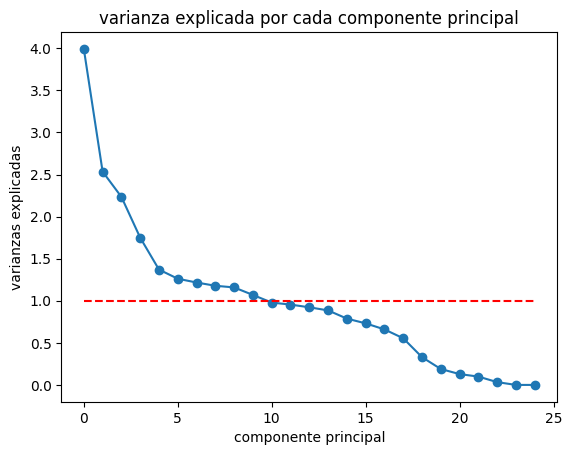

In [30]:
 
varianzas = cor.values.diagonal()

 
num_c_principal=[] ; l_var_expl=[] ; varianzas_componentes=[]
varianzas_componentes = pca.explained_variance_

    
for i, varianza_expl in enumerate(varianzas_componentes):
    num_c_principal.append(i)
    l_var_expl.append(varianza_expl)
    #print(f"varianza explicada por la componente principal {i+1}: {varianza}")
    
plt.scatter(num_c_principal,l_var_expl)
plt.plot(num_c_principal,l_var_expl)

plt.title('varianza explicada por cada componente principal')
plt.xlabel('componente principal')
plt.ylabel('varianzas explicadas')
plt.plot(num_c_principal,varianzas,'r--')



#### <span style='color:orchid'> Calcula el % de varianza explicada en función del número de componentes principales total y represéntalo en una gráfica.Para calcular el % de varianza explicada para 3 componentes principales, por ejemplo, suma la varianza en esas 3 coordenadas y divídelo entre la varianza total en el dataset (esto debe ser igual al número de variables originales, ya que has tenido que estandarizar las variables), y multiplícalo por 100. </span>

Para poder explicar la información contenida en nuestro conjunto de datos hace falta que el % de varianza explicada por el número de componentes
debe ser mayor o igual al 95% si elegimos un nivel de significación del 5%. En el gráfico se puede observar que necesitaríamos escoger bastantes componentes
para cumplir esta condición, tal vez nos quedaríamos con las 15,16 o 17 primeras. Aunque sigan siendo bastantes, habremos reducido la dimensionalidad al poder prescindir de al
menos las cinco componentes con menos varianza.

Text(0, 0.5, 'porcentanje de varianza explicada sobre el total')

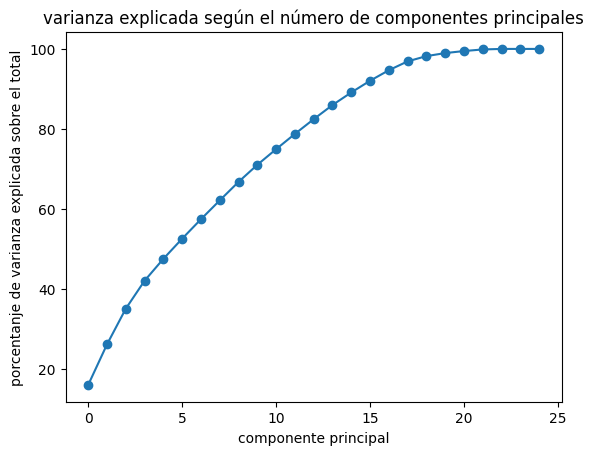

In [31]:
num_c_principal=[] ; l_var_expl=[] ; varianzas_componentes=[]
varianzas_componentes = pca.explained_variance_ratio_


for i, _ in enumerate(varianzas_componentes): 
    num_c_principal.append(i)
    l_var_expl.append(sum(varianzas_componentes[0:(i+1)])*100)
    
    
plt.scatter(num_c_principal,l_var_expl)
plt.plot(num_c_principal,l_var_expl)

plt.title('varianza explicada según el número de componentes principales')
plt.xlabel('componente principal')
plt.ylabel('porcentanje de varianza explicada sobre el total')





#### <span style='color:orchid'> Visualiza el dataset en la proyección 2D de las 2 primeras componentes principales y asigna a cada punto un color en función de la variable a predecir. ¿Se observan grupos de puntos con una tendencia mayor hacia una clase? ¿Se te ocurre alguna manera de saber cuáles son esos grupos? </span>

Tenemos una serie llamada estatus con las clases de las muestras, vamos a representar las muestas de clase 1 con el color naranja y el 0 con el color verde y así conseguimos la columna que queremos. Creamos un nuevo dataframe con la información inicial de data, las tres columnas con las coordenadas de las 
3 componentes principales con más varianza y la columna con los colores. 

En el gráfico de dispersión podemos ver cómo las muestras están todas amontonadas, independientemente de la clase, en la parte inferior izquierda, y a medida que avanzamos en los dos
ejes nos encontramos con muestras cada vez más distancias de otras. Creemos que podríamos considerar como outliers aquellas muestras que tienen un valor>5 respeto de la 1ª componente
principal.

Con esta gráfica no somos capaces de distinguir tendencias de dispersión según la clase, aunque en la siguiente celda lo intentaremos de una forma adicional.



In [32]:
import plotly ;import plotly.express as px
color_map = {'0': 'green', '1': 'orange'}
status=y.copy()
status.replace(0,'0',inplace=True) ; status.replace(1,'1',inplace=True) 
c_principal1=df_Xpca.iloc[:,0]
c_principal2=df_Xpca.iloc[:,1]
c_principal3=df_Xpca.iloc[:,2]
new_cols=pd.DataFrame([c_principal1,c_principal2,c_principal3,status]).T
new_data=pd.concat([data,new_cols],axis=1)

new_data.rename(columns={0: 'componente_principal1',1:'componente_principal2',2: 'cp3'}, inplace=True)

fig=px.scatter(new_data,x='componente_principal1',y='componente_principal2',color='Churn Status',color_discrete_map=color_map, title='gráfico de dispersión',hover_data=new_data.columns)
fig.show()


Una manera de tratar de distinguir grupos con PCA es usar una componente principal más (la tercera más significativa) y representar en 3 dimensiones. Podemos ver que sigue sin
ser posible distinguir entre grupos. Esto es normal ya que hay que recordar que PCA se encarga de reducir la dimensionalidad al crear nuevas variables que expliquen la 
información de los datos introducidos, pero no tiene como objetivo poder distinguir grupos de muestras de la misma clase, como sí hace LDA. 

In [33]:
fig=px.scatter_3d(new_data,x='componente_principal1',y='componente_principal2',z='cp3',color='Churn Status',color_discrete_map=color_map, title='gráfico de dispersión',hover_data=new_data.columns)
fig.show()

#### <span style='color:orchid'> Representa las variables originales sobre el espacio PCA junto a los datos, y comprueba si se forman grupos de variables. Para ello, por cada variable original i, crea un vector de todo ceros menos un 1, justo en la columna i, y calcula la proyección PCA. Visualiza estas proyecciones como líneas que parten desde las coordenadas (0,0) en el espacio PCA y terminan en la proyección PCA correspondiente. Utiliza también el comando plt.text de pyplot para etiquetar cada una de esas proyecciones para obtener algo parecido a esto:  </span>

Con esta función podemos representar los puntos anteriores (aunque en un espacio más reducido) junto con las proyecciones de cada una de las 
variables originales del dataset sobre el espacio PCA formado por las dos componentes con más varianza.

En la función, después de calcular X_pca, cogemos las primeras dos columnas y representamos con puntos verdes las muestras de clase 0 y naranjas las de clase 1.Luego construímos una matriz identidad de 25x25 (nº de nuestras variables originales) que transformaremos con la instancia pca. Al hacer esto, obtenemos un array de 25 valores que serán las proyecciones de cada variable original, que representaremos con flechas negras desde el (0,0). Para una representación correcta usamos el factor para que no haya una gran diferencia de tamaño de flechas.

Podemos distinguir grupos de flechas, es decir, variables originales que tienen proyecciones casi idénticas. Serán columnas por tanto con patrones muy similares, como pasa 
con Network_Type_Subcription_in_Month1/2_3G, lo cual tiene mucho sentido: los patrones que sigue el valor 3G para aparecer como el tipo de conexión en las muestras son muy parecidos o iguales entre el primer mes y el 2º. También tienen proyecciones muy parecidas en el grupo de las variables codificadas de Most Loved Competitor network.

Esta nube de puntos sería diferente si al hacer dummies hubiésemos elegido drop_first=False. Al tenerlo en True eliminamos la columna de la 1ª categoría después de la codificación one-hot, lo que ayuda a reducir la multicolinealidad. Por ello, estamos haciendo PCA con muchas menos columnas que si hubiésemos optado por mantener en falso este parámetro
en los dummies (y por consecuente los valores de X_pca cambiarían y el gráfico de dispersión sería muy distinto). Por ello, es distinta a la que se muestra en el pdf.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Temp\ipykernel_23520\2642821887.py:14: UserWarning:

No 

<Figure size 3000x0 with 0 Axes>

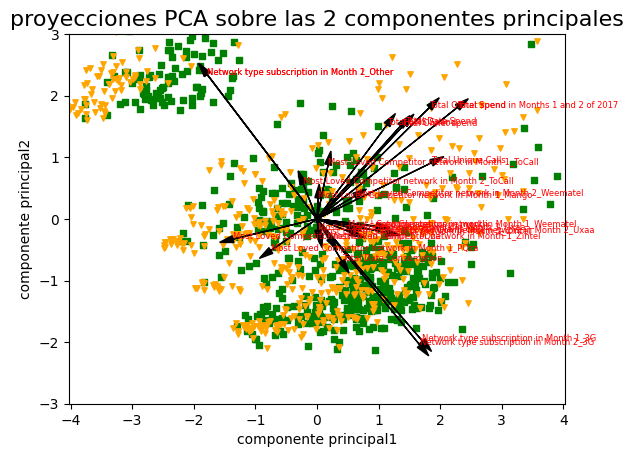

<Figure size 3000x0 with 0 Axes>

In [36]:
import numpy as np

from sklearn.decomposition import PCA ; from matplotlib import pyplot as plt

def PCA_plot(X_std, y, attribute_names, classes_names,
             colors, markers, pca,
             ax, pc_x=0, pc_y=1):


    X_pca = pca.transform(X_std)
    for label,color,marker in zip(classes_names,colors,markers):
          #cogemos los indices de y donde hay muestras pertenecientes a la clase que queremos
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 15,
                    c = color,
                    marker = marker,
                    alpha = 1.0,
                    cmap='RdYlGn',
                    label = label)
    factor = 6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5,
                 head_length=1/4*0.1*factor*1.5, fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r',size=6)
attribute_names=data.columns
classes_names=[0,1]           
colors=['green','orange','blue','red','pink']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

ax = plt.subplot(1,1,1)

plt.gca().set_aspect('equal', adjustable='box')

PCA_plot(x_train,y,attribute_names,classes_names,colors,markers,pca,ax)

plt.title('proyecciones PCA sobre las 2 componentes principales', fontsize=16)
plt.axis('equal')
plt.xlabel('componente principal1') ; plt.ylabel('componente principal2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.figure(figsize=(30,0))


    
    

#### <span style='color:orchid'> Repite todo esto con las variables sin estandarizar. ¿Cuál es el efecto? </span>

Al hacer pca sin el estandarizado podemos observar gran desequilibrio entre la varianza explicada por las variables, donde la primera varianza abarca más del 95% del
porcentaje total de varianza explicada, y que por tanto bastaría con quedarnos con ella. Esto se puede ver mejor en el gráfico, con el que comprobamos que, si no estandarizamos, las escalas de las variables pueden afectar significativamente los resultados, ya que las variables con mayor magnitud dominarán la variabilidad y tendrán una mayor influencia en la determinación de los componentes principales.
Después del estandarizado, todas las variables tendrían la misma escala. 

In [21]:

pca = PCA() # núm. componentes principales = núm. variables
pca.fit(data)
X_pca = pca.transform(data) #ordenados los array de mayor a menor importancia
df_Xpca=pd.DataFrame(X_pca)
print(pca.explained_variance_)

[5.38865539e+13 1.40954703e+09 1.19089017e+08 1.62875759e+06
 7.51396575e+05 7.10520097e+04 2.70514988e+04 2.42048671e+03
 6.15887858e+00 4.97875083e-01 3.38240469e-01 1.90410994e-01
 1.78773738e-01 1.51115649e-01 1.45532661e-01 1.17301095e-01
 9.95661541e-02 7.67668644e-02 4.62490771e-02 4.02099708e-02
 3.06347323e-02 1.19229562e-02 4.42669465e-03 7.05935303e-06
 6.64338808e-33]


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra

Text(0, 0.5, 'porcentanje de varianza explicada sobre el total')

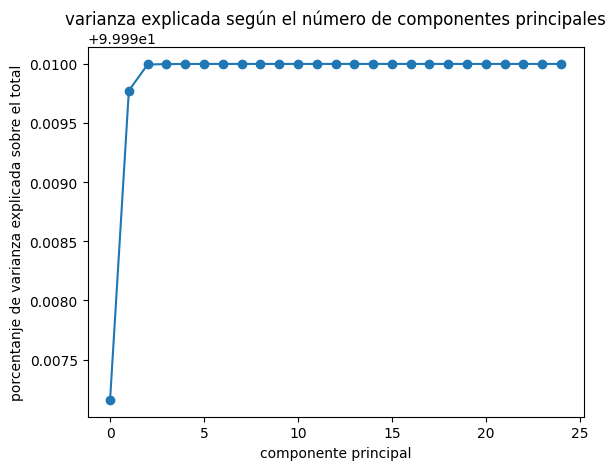

In [22]:
num_c_principal=[] ; l_var_expl=[] ; varianzas_componentes=[]
varianzas_componentes = pca.explained_variance_ratio_


for i, _ in enumerate(varianzas_componentes): 
    num_c_principal.append(i)
    l_var_expl.append(sum(varianzas_componentes[0:(i+1)])*100)
    
    
plt.scatter(num_c_principal,l_var_expl)
plt.plot(num_c_principal,l_var_expl)

plt.title('varianza explicada según el número de componentes principales')
plt.xlabel('componente principal')
plt.ylabel('porcentanje de varianza explicada sobre el total')





Por otro lado, PCA nos sigue creando nuevas variables que, aun no estando estandarizados los datos de entrada, las componentes siguen estando incorreladas entre sí, ya que nos sigue saliendo una matriz de ceros con solo unos en la diagonal.

In [23]:
cor=df_Xpca.corr() #matriz de covarianzas y varianzas en la diagonal de vars estandarianzas
print(cor)

              0             1             2             3             4   \
0   1.000000e+00  1.845559e-14 -4.655763e-17  7.564798e-14 -1.400939e-14   
1   1.845559e-14  1.000000e+00  4.385218e-16 -3.238051e-15 -1.710207e-15   
2  -4.655763e-17  4.385218e-16  1.000000e+00  2.517273e-14 -3.018111e-15   
3   7.564798e-14 -3.238051e-15  2.517273e-14  1.000000e+00 -2.510906e-15   
4  -1.400939e-14 -1.710207e-15 -3.018111e-15 -2.510906e-15  1.000000e+00   
5   1.607202e-15 -4.991956e-15  4.848325e-15  1.391715e-15  4.433830e-15   
6   7.230317e-15  5.174978e-15 -5.264622e-15 -8.143231e-16 -5.941324e-15   
7  -5.198334e-15 -3.275055e-14 -8.974949e-15  5.563324e-15 -1.239415e-15   
8   6.632063e-18 -8.231186e-16 -1.256168e-16  1.231417e-16  1.000770e-16   
9   2.509523e-14 -1.892873e-14 -2.581047e-15 -9.466664e-15 -1.575838e-14   
10  1.816398e-13 -1.166453e-14  3.707320e-15 -7.985041e-15 -8.802448e-15   
11  4.997651e-13 -5.542149e-15 -3.339399e-14 -1.038806e-14 -1.181768e-14   
12  2.287333

En el gráfico de dispersión inferior vemos una distribución muy mala de los datos y muy difícil de analizar debido a que sin la estandarización las coordenadas en las componentes principales tienen escalas muy distintas. Tal y como nos pasaba al estandarizar, no podemos distinguir tendencias o grupos de muestras de una misma clase.

In [24]:
import plotly ;import plotly.express as px
color_map = {'0': 'green', '1': 'orange'}
status=y.copy()
status.replace(0,'0',inplace=True) ; status.replace(1,'1',inplace=True) 
c_principal1=df_Xpca.iloc[:,0]
c_principal2=df_Xpca.iloc[:,1]
c_principal3=df_Xpca.iloc[:,2]
new_cols=pd.DataFrame([c_principal1,c_principal2,c_principal3,status]).T
new_data=pd.concat([data,new_cols],axis=1)

new_data.rename(columns={0: 'componente_principal1',1:'componente_principal2',2: 'cp3'}, inplace=True)

fig=px.scatter(new_data,x='componente_principal1',y='componente_principal2',color='Churn Status',color_discrete_map=color_map, title='gráfico de dispersión',hover_data=new_data.columns)
fig.show()


A la hora de hacer las proyecciones de las variables originales, podemos ver que sigue siendo la misma representación aunque la escala es mucho mayor. Al transformar la matriz identidad
pasándola por PCA obtenemos las proyecciones con valores mucho más grandes, y creemos que se debe a la magnitud de los valores que tiene la primera componente. Sin embargo, pasa lo mismo que en el ejercicio anterior: la representación de los puntos según las coordenadas PCA no es nada buena.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\juanj\AppData\Local\Temp\ipykernel_18796\3359079779.py:14: UserWarning:

No 

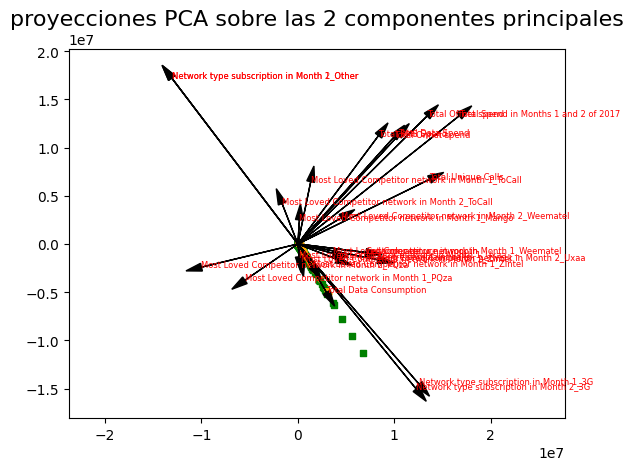

In [119]:
ax = plt.subplot(1,1,1)

plt.gca().set_aspect('equal', adjustable='box')

PCA_plot(data,y,attribute_names,classes_names,colors,markers,pca,ax)

plt.title('proyecciones PCA sobre las 2 componentes principales', fontsize=16)
plt.axis('equal');



# <span style='color:mediumpurple'> SEMANA 2 </span>
